## <b><span style="color: lightblue;">Entrega Final - Python para Ciência de Dados<span></b>
#### Alunos: João Henrique Santos e Samuel Gomes
Nota: A base de dados utilizada pode ser encontrada em <a>https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data</a>


### <b><span style="color: lightblue;">Relevância dos dados - Porque faz sentido explorá-los.<span></b>

Explorar dados para prever o churn de clientes é uma estratégia crucial para bancos e fintechs que buscam reter seus clientes em um mercado altamente competitivo. Em um banco moderno, a retenção de clientes não é só uma questão de manter uma base estável, mas sim uma peça-chave para o crescimento sustentável. Quando um cliente deixa o banco, a perda vai muito além da receita imediata, pois representa também uma quebra na possibilidade de ofertas futuras, como novos produtos financeiros, crédito, investimentos e até mesmo no uso contínuo dos serviços oferecidos.

Ao antecipar o churn, a instituição financeira pode atuar de forma proativa para manter o cliente engajado. Ter essas informações permite criar estratégias personalizadas que abordam diretamente as necessidades do cliente, tornando o relacionamento mais próximo e relevante. Em um mercado onde o custo de aquisição é alto, manter os clientes que já estão na base é uma vantagem estratégica. Sabemos que adquirir um novo cliente envolve custos elevados com marketing, ofertas e campanhas de incentivo; evitar o churn reduz esses custos e permite que o banco direcione investimentos para aprimorar a experiência dos clientes atuais.

Além disso, o entendimento dos motivos do churn nos ajuda a pensar em estratégias de personalização e cross-selling. A partir dos dados, conseguimos identificar padrões de comportamento que indicam, por exemplo, clientes em risco de saída devido ao baixo volume de transações ou baixo uso de crédito. Com essas informações, podemos direcionar campanhas específicas para aumentar a frequência de transações ou criar incentivos que gerem mais valor e engajamento para esses clientes. Essa abordagem contribui não só para reter clientes, mas também para oferecer um serviço mais personalizado, o que é cada vez mais esperado em uma era de experiências financeiras digitais e customizadas.

Outro ponto importante é a possibilidade de usar Machine Learning para identificar padrões complexos que indicam risco de churn. Esse tipo de análise permite ir além de variáveis com alta correlação e explorar a causalidade, possibilitando uma compreensão real das causas do churn e ações mais precisas. Por exemplo, ao identificarmos que clientes com saldo devedor rotativo alto e baixa frequência de transações estão mais propensos a sair, conseguimos criar intervenções específicas, como ofertar crédito com melhores condições ou novos serviços que incentivem o uso recorrente. Isso torna as ações de retenção mais efetivas e melhora o retorno sobre o investimento.

A capacidade de antecipar o churn também aumenta o valor de longo prazo dos clientes, conhecido como Lifetime Value (LTV). Com isso, a instituição não só consegue manter uma base mais rentável, mas também otimiza sua estratégia de crescimento. Em um mercado onde a concorrência é intensa e novas fintechs estão sempre emergindo, entender os fatores que influenciam o churn permite que o banco se adapte mais rapidamente e ofereça uma experiência alinhada às expectativas dos clientes.

Além do valor estratégico, esse tipo de análise ainda auxilia na conformidade com regulamentações e na responsabilidade social, pois permite identificar grupos de clientes que precisam de condições de crédito mais adequadas ou atendimento mais próximo. Isso fortalece a relação de confiança com os clientes e contribui para uma imagem positiva da instituição no mercado.

Portanto, explorar dados de churn em um banco moderno é muito mais do que apenas evitar perdas; trata-se de criar uma experiência de valor que gera fidelidade, maximiza a rentabilidade e fortalece a marca como parceira confiável e inovadora.

### <b><span style="color: lightblue;">Tratamento Inicial da Base<span></b>


In [36]:
### Importando bibliotecas necessárias para as análises
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

In [57]:
# Lendo a base de dados
data = pd.read_csv("BankChurners.csv")
data = data.iloc[:, :-2] # Retirando últimas duas colunas irrelevantes para o trabalho
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [18]:
data['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [58]:
# Tratando a variável Income_Category
"""
A variável Income_Category vem com o tipo str, sem ordem aparente. No entanto,
sabemos que existe um ordenamento natural entre os níveis de renda. Por isso,
vamos tratar essa coluna do nosso DataFrame para capturar essa natureza do dado.
"""

data['Income_Category'].unique() # Verificando os possíveis valores de Income_Category

income_order = [
    "Less than $40K", 
    "$40K - $60K", 
    "$60K - $80K", 
    "$80K - $120K", 
    "$120K +",
    "Unknown"
]

data['Income_Category'] = pd.Categorical(data['Income_Category'],
                                         categories=income_order,
                                         ordered=True)


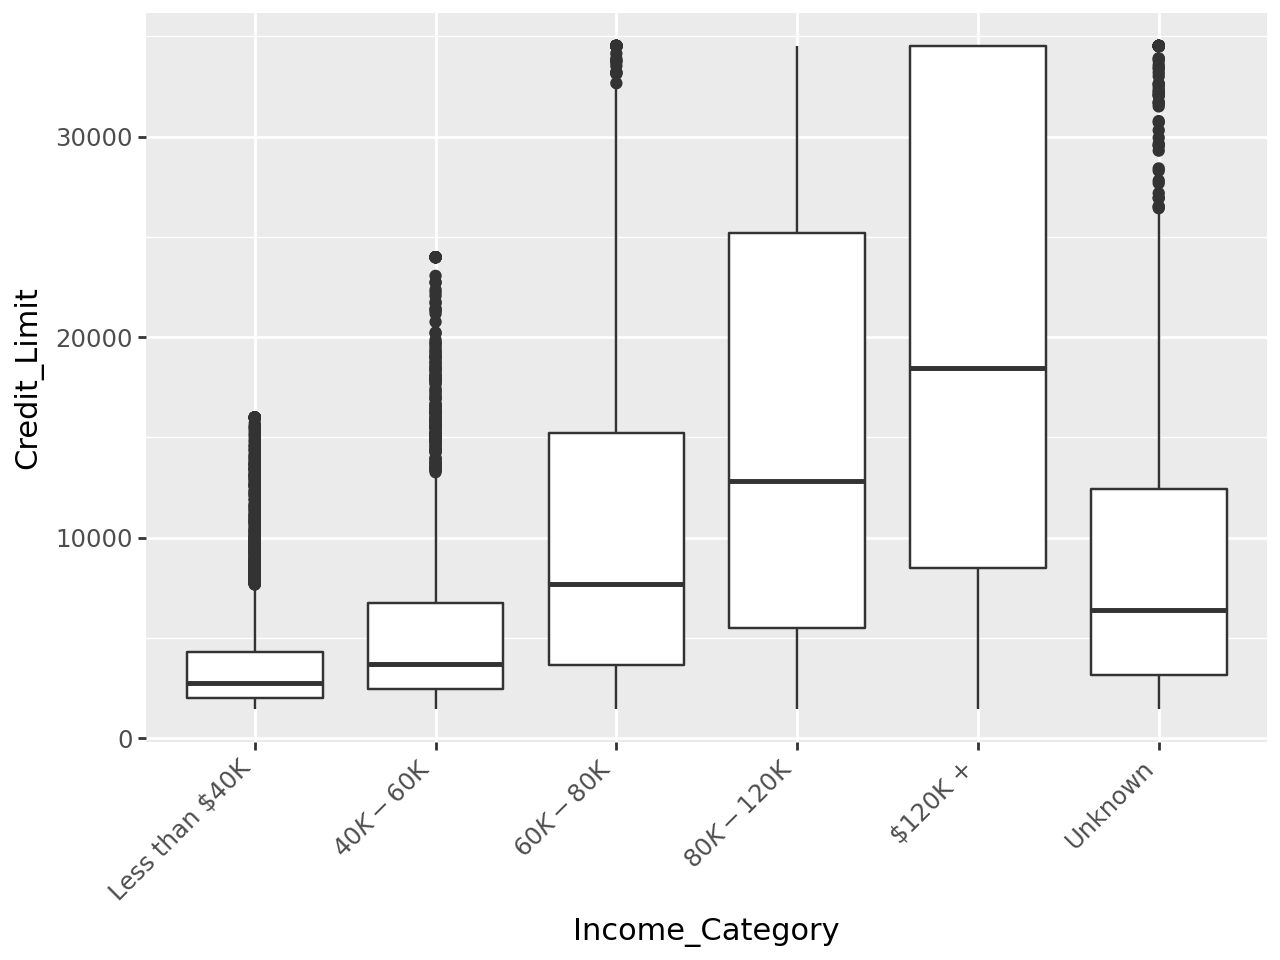

'\nNote que e o eixo x está segundo a ordem que definimos.\nEssa configuração vai facilitar as análises mais pra frente\nneste trabalho.\n'

In [20]:
# Criando um Boxplot para verificar o tratamento da variável Income_Category

# Boxplot do Credit_Limit pela Income_Category
boxplot = (
    ggplot(data, aes(x='Income_Category', y='Credit_Limit'))
    + geom_boxplot()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

boxplot.show()

"""
Note que e o eixo x está segundo a ordem que definimos.
Essa configuração vai facilitar as análises mais pra frente
neste trabalho.
"""

In [25]:
# Vamos verificar se precisamos fazer uma transformação em mais alguma coluna
print(data.dtypes)

"""
Note que as variáveis:

Attrition_Flag
Gender
Education_Level
Marital_Status
Card_Category

estão como tipo "object". O Pandas trata strings, arquivos e alguns 
outros tipos de dados mais complexos como "objects". No nosso caso, 
todas as variáveis em questão estão como strings que representam na
verdade suas categorias. Vamos aplicar a mesma transformação que
fizemos para Income_Category para estas variáveis na próxima célula. 
"""

CLIENTNUM                      int64
Attrition_Flag                object
Customer_Age                   int64
Gender                        object
Dependent_count                int64
Education_Level               object
Marital_Status                object
Income_Category             category
Card_Category                 object
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
dtype: object


'\nNote que as variáveis:\n\nAttrition_Flag\nGender\nEducation_Level\nMarital_Status\nCard_Category\n\nestão como tipo "object". O Pandas trata strings, arquivos e alguns \noutros tipos de dados mais complexos como "objects". No nosso caso, \ntodas as variáveis em questão estão como strings que representam na\nverdade suas categorias. Vamos aplicar a mesma transformação que\nfizemos para Income_Category para estas variáveis na próxima célula. \n'

In [28]:
data['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [59]:
# Convertendo variáveis categóricas para tipo correto no Dataframe do Pandas

general_categorical_variables = ['Attrition_Flag','Gender','Education_Level',
                         'Marital_Status','Card_Category']

data[general_categorical_variables] = data[general_categorical_variables].astype('category')

"""
Note que usamos um método diferente do usado com a Income_Category.
Isso porque o método .astype() é mais simples e pode ser usado para
os casos em que não precisamos, por exemplo, definir uma ordem para
as categorias ou definir quais são elas.

Vamos tratar Education_Level e Card_Category de forma diferente, assim
como fizemos com Income_Category pois essas variáveis também parecem 
exigir uma atenção maior e uma definição de ordem das categorias.
"""

'\nNote que usamos um método diferente do usado com a Income_Category.\nIsso porque o método .astype() é mais simples e pode ser usado para\nos casos em que não precisamos, por exemplo, definir uma ordem para\nas categorias ou definir quais são elas.\n\nVamos tratar Education_Level e Card_Category de forma diferente, assim\ncomo fizemos com Income_Category pois essas variáveis também parecem \nexigir uma atenção maior e uma definição de ordem das categorias.\n'

In [60]:
data['Education_Level'].unique()

education_order = [
    "Uneducated",
    "High School",
    "College",
    "Graduate",
    "Post-Graduate",
    "Doctorate",
    "Unknown"
]

data['Education_Level'] = pd.Categorical(data['Education_Level'],
                                         categories=education_order,
                                         ordered=True)

print(data['Education_Level'].dtype)
print(data['Education_Level'])

category
0        High School
1           Graduate
2           Graduate
3        High School
4         Uneducated
            ...     
10122       Graduate
10123        Unknown
10124    High School
10125       Graduate
10126       Graduate
Name: Education_Level, Length: 10127, dtype: category
Categories (7, object): ['Uneducated' < 'High School' < 'College' < 'Graduate' < 'Post-Graduate' < 'Doctorate' < 'Unknown']


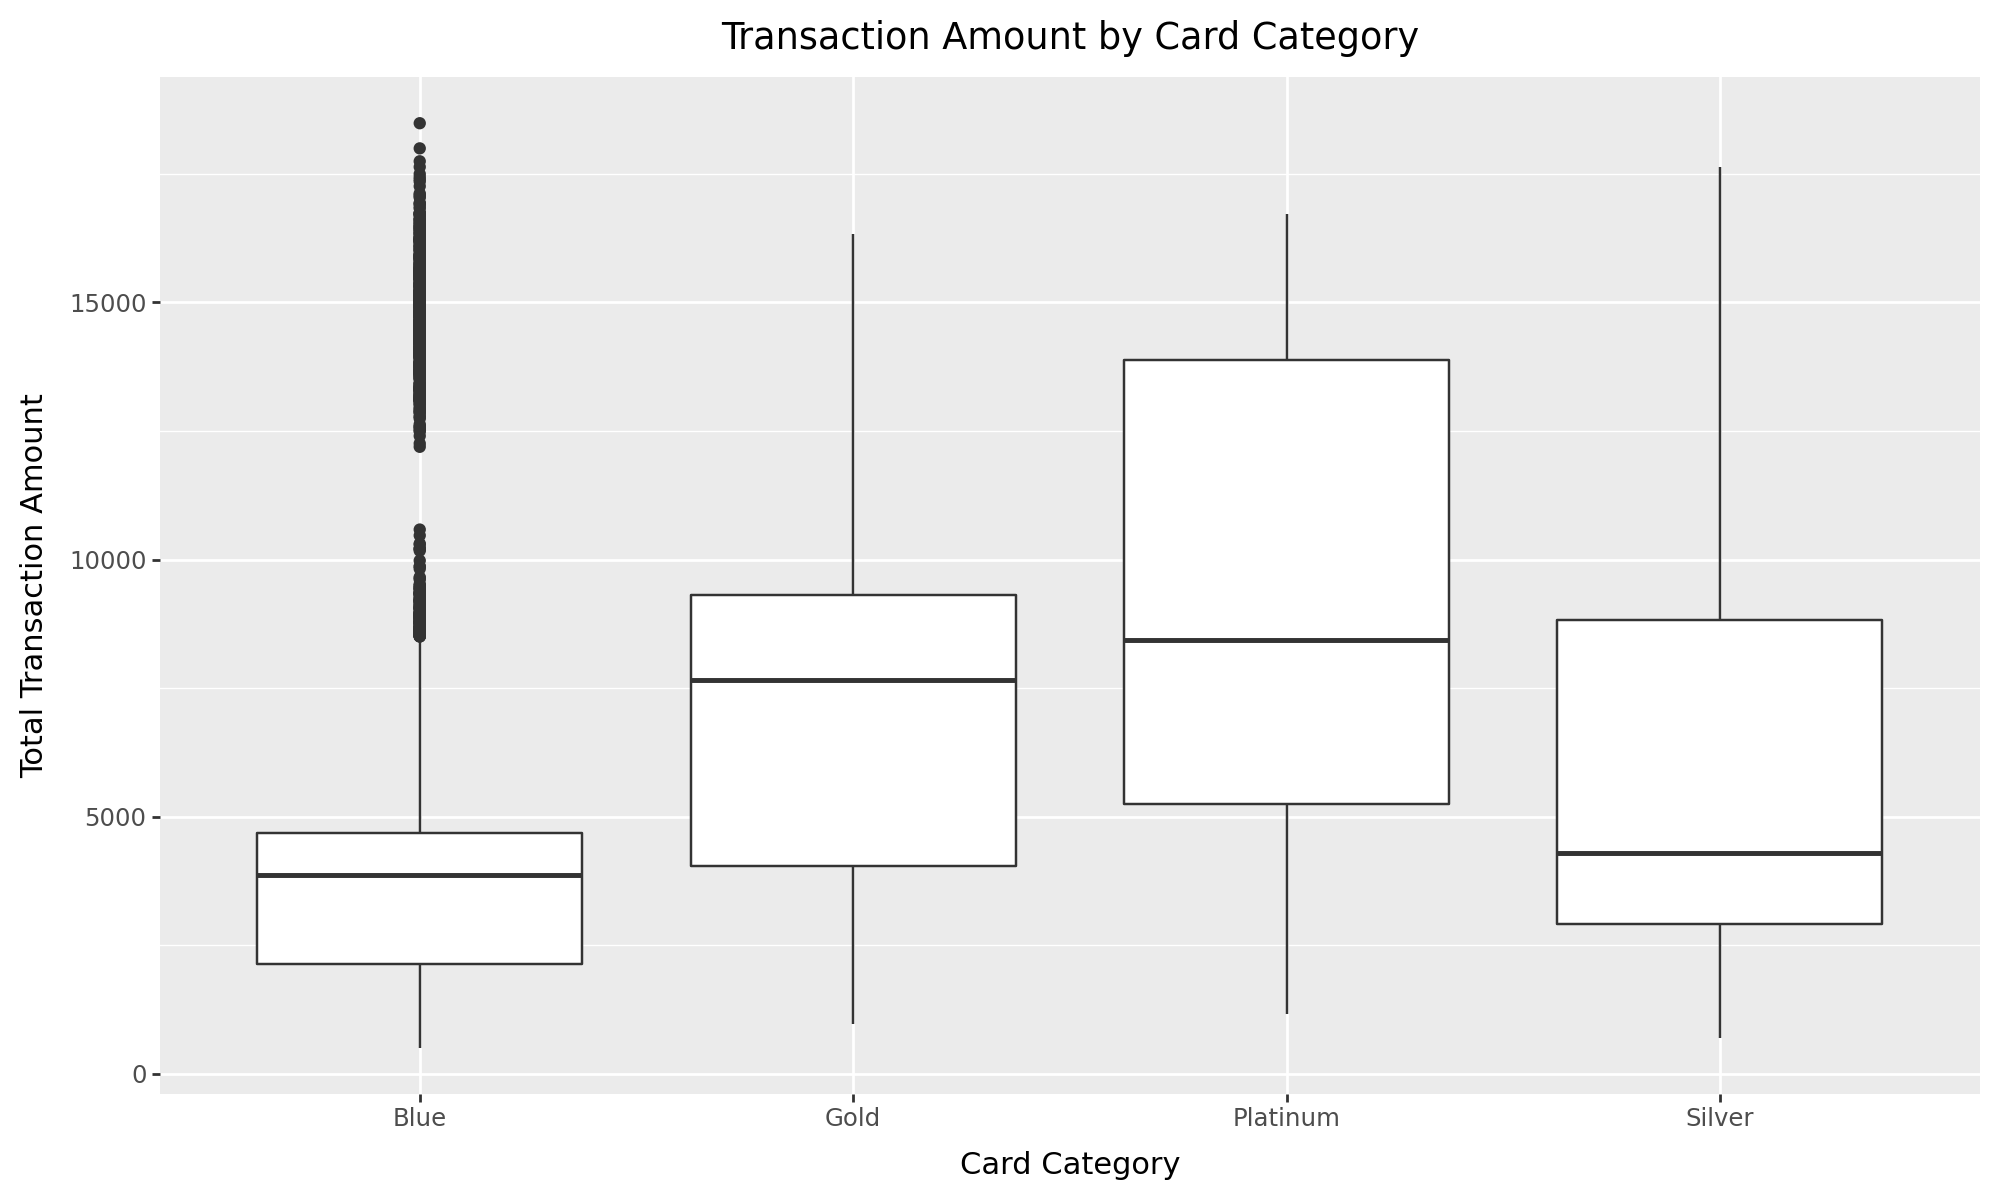

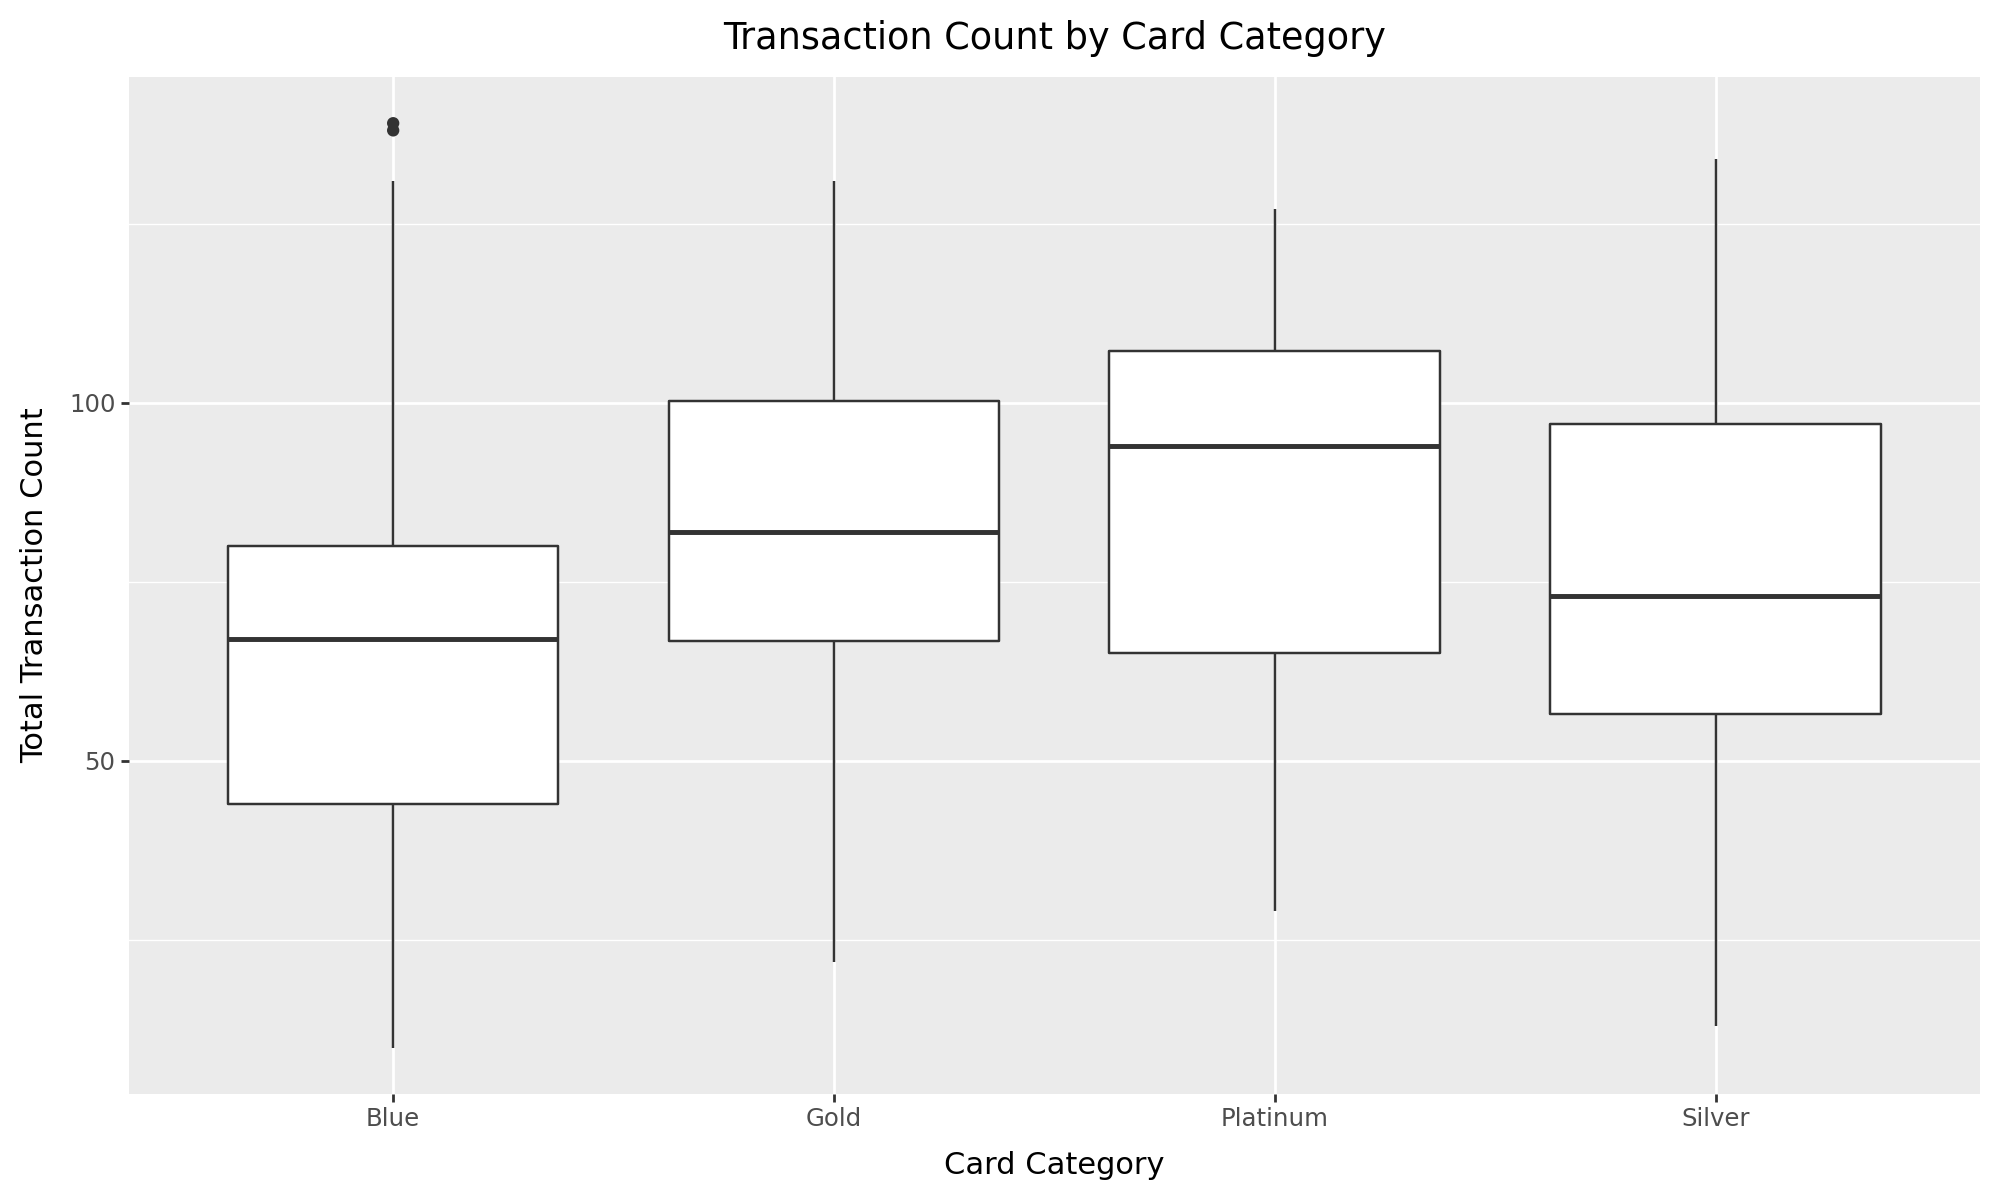

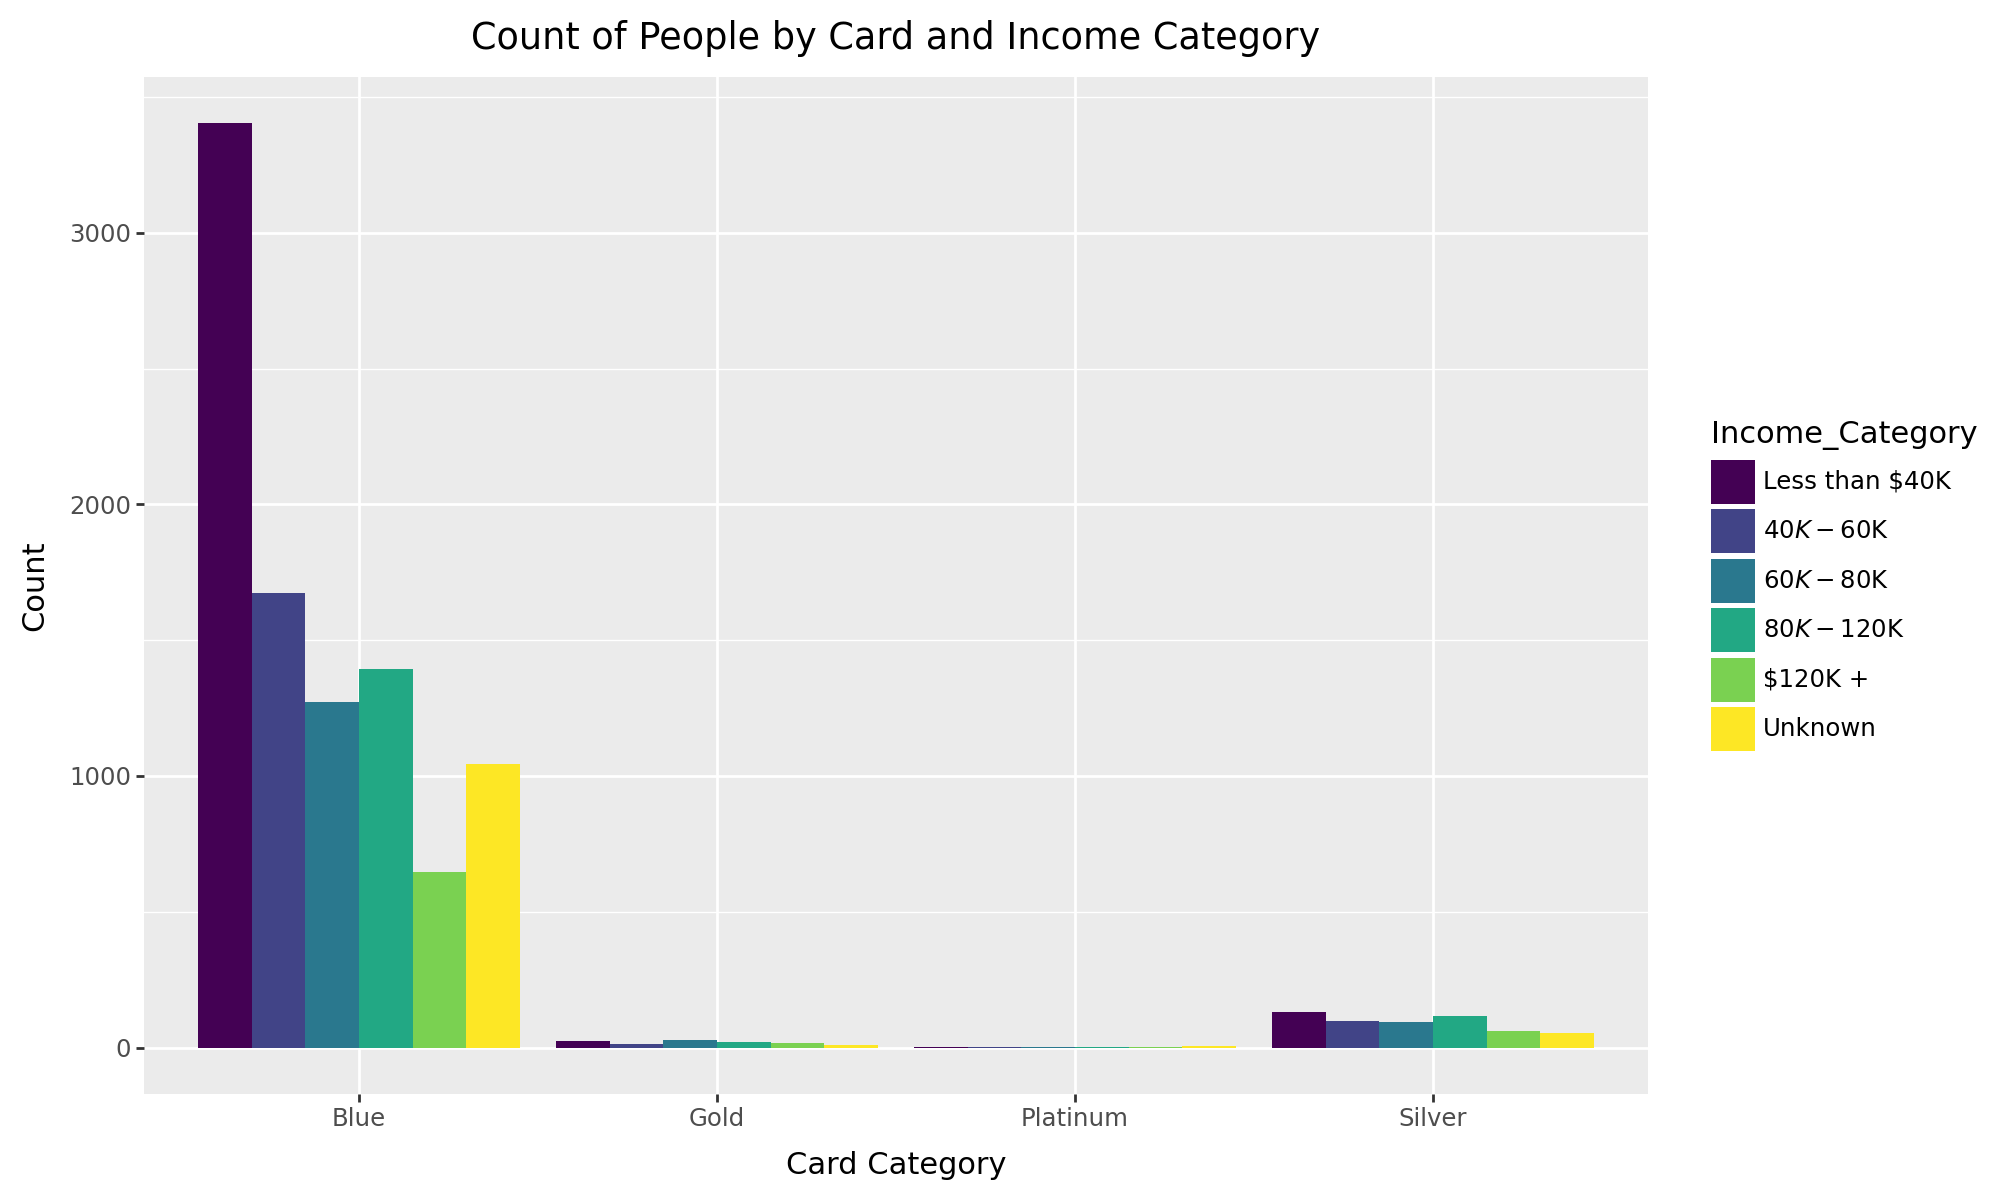

In [40]:
# Verificando melhor ordem para Card_Category
"""
A ordem ideal para os tipos de cartões não é clara. Ainda mais hoje
em dia que os bancos definem 1001 nomes para tipos de cartões.

Por isso, os gráficos abaixo podem nos dar uma ideia da exclusividade 
de cada cartão para que possamos definir uma ordem coerente para essa categoria.
"""

# Checando relação entre tipos de cartão e valor total de transações feitas
boxplot_trans_amount = (
    ggplot(data, aes(x='Card_Category', y='Total_Trans_Amt'))
    + geom_boxplot()
    + labs(x='Card Category', y='Total Transaction Amount', title='Transaction Amount by Card Category')
    + theme(figure_size=(10, 6))
)

boxplot_trans_amount.show()

# Checnando relação entre tipos de cartão e quantidade de transações feitas
boxplot_trans_count = (
    ggplot(data, aes(x='Card_Category', y='Total_Trans_Ct'))
    + geom_boxplot()
    + labs(x='Card Category', y='Total Transaction Count', title='Transaction Count by Card Category')
    + theme(figure_size=(10, 6))
)

boxplot_trans_count.show()

# Checnando relação entre tipos de cartão e níveis de renda
barplot_card_income = (
    ggplot(data, aes(x='Card_Category', fill='Income_Category'))
    + geom_bar(position="dodge")  # position="dodge" creates separate bars for each Income_Category
    + labs(x='Card Category', y='Count', title='Count of People by Card and Income Category')
    + theme(figure_size=(10, 6))
)

barplot_card_income



In [54]:
data['Card_Category'].unique()


['Blue', 'Gold', 'Silver', 'Platinum']
Categories (4, object): ['Blue', 'Gold', 'Platinum', 'Silver']

In [61]:
# Transformando Card_Category em variável categórica
"""
Parece que a ordem Blue, Silver, Gold e Platinum é coerente.
Ordenando os cartões pelo menos exclusivo até o mais exclusivo.
Vamos implementar a transformação com base nessa ordem.
"""
data['Card_Category'].unique()

card_order = [
    "Blue",
    "Silver",
    "Gold",
    "Platinum"
]

data['Card_Category'] = pd.Categorical(data['Card_Category'],
                                         categories=card_order,
                                         ordered=True)

print(data['Card_Category'].dtype)
print(data['Card_Category'])


category
0          Blue
1          Blue
2          Blue
3          Blue
4          Blue
          ...  
10122      Blue
10123      Blue
10124      Blue
10125      Blue
10126    Silver
Name: Card_Category, Length: 10127, dtype: category
Categories (4, object): ['Blue' < 'Silver' < 'Gold' < 'Platinum']


In [62]:
# Encoding a variável resposta
"""
O objetivo desse trabalho será, principalmente, gerar conclusões
acerca da variável resposta Attrition_Flag que indica se o consumidor
permanece ativo ou deu churn. Para essa análise tratar a variável como
1 (deu churn - "Attrited Customer") ou 0 (continua ativo - "Existing Customer").

Vamos realizar essa transformação.
"""

data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer':1})

data['Attrition_Flag']

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: category
Categories (2, int64): [1, 0]

In [63]:
"""
Ótimo. Agora que fizemos os tratamentos iniciais da base podemos
partir para uma análise mais aprofundada. 

Outras transformações provavelmente serão necessárias durante o
processo de análise. Porém elas serão mais contextuais para adequar
a base a modelos de ML específicos ou serão feitas usando transformadores
como .groupby entre outros, usando esta base original como padrão.
"""

treated_data = data
treated_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


### <b><span style="color: lightblue;">Visualizações e Análises.<span></b>


In [ ]:
## Boxplots ##

# Uso de variáveis contínuas ou numéricas discretas em relação à categórica Attrition_Flag

# Código da Visualização

data = pd.read_csv



# Análise dos resultados
"""


"""